<a href="https://colab.research.google.com/github/Cliffochi/aviva_data_science_course/blob/main/binary_classification_of_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# two value classification of ayame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# feature selection
# selecting the 2 features i.e. sepal_length and petal_length
X = iris.data[:, :3]
feature_names2 = iris.feature_names[:2]
print(f"selected features: {feature_names2}")
print(f"shape of feature data(X): {X.shape}")

selected features: ['sepal length (cm)', 'sepal width (cm)']
shape of feature data(X): (150, 3)


In [ ]:
# selecting data points belonging to the first two classes
X_binary = X[iris.target < 2]
y_binary = iris.target[iris.target < 2]
target_names_binary = iris.target_names[:2]
print(f"shape of data points: {X_binary.shape}")
print(f"shape of target points: {y_binary.shape}")

shape of data points: (100, 3)
shape of target points: (100,)


In [ ]:
# splitting the data into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.25, random_state=42)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (75, 3)
Shape of X_test: (25, 3)
Shape of y_train: (75,)
Shape of y_test: (25,)


In [ ]:
# model implementation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# initializing the classifiers
LR = LogisticRegression()
KNN = KNeighborsClassifier()
SVM = SVC()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier(random_state=42) # for reproducibility


In [ ]:
# model training
LR.fit(X_train, y_train)
KNN.fit(X_train, y_train)
SVM.fit(X_train, y_train)
DT.fit(X_train, y_train)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
from re import A
# making predictions and evaluation
from sklearn.metrics import accuracy_score#, confusion_matrix, classification_report

# make predictions of the test sets
y_predicted_logistic = LR.predict(X_test)
y_predicted_KNN = KNN.predict(X_test)
y_predicted_SVM = SVM.predict(X_test)
y_predicted_DT = DT.predict(X_test)
y_predicted_RF = RF.predict(X_test)

# calculating accuracy of the models
accuracy_logistic = accuracy_score(y_test, y_predicted_logistic)
accuracy_KNN = accuracy_score(y_test, y_predicted_KNN)
accuracy_SVM = accuracy_score(y_test, y_predicted_SVM)
accuracy_DT = accuracy_score(y_test, y_predicted_DT)
accuracy_RF = accuracy_score(y_test, y_predicted_RF)

# display the outputs
print(f"Accuracy of Logistic Regression: {accuracy_logistic: .2f}")
print(f"Accuracy of KNN: {accuracy_KNN: .2f}")
print(f"Accuracy of SVM: {accuracy_SVM: .2f}")
print(f"Accuracy of Decision Tree: {accuracy_DT: .2f}")
print(f"Accuracy of Random Forest: {accuracy_RF: .2f}")

Accuracy of Logistic Regression:  1.00
Accuracy of KNN:  1.00
Accuracy of SVM:  1.00
Accuracy of Decision Tree:  1.00
Accuracy of Random Forest:  1.00


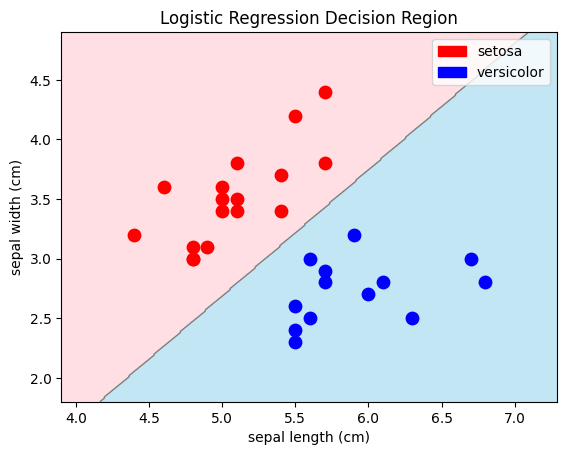

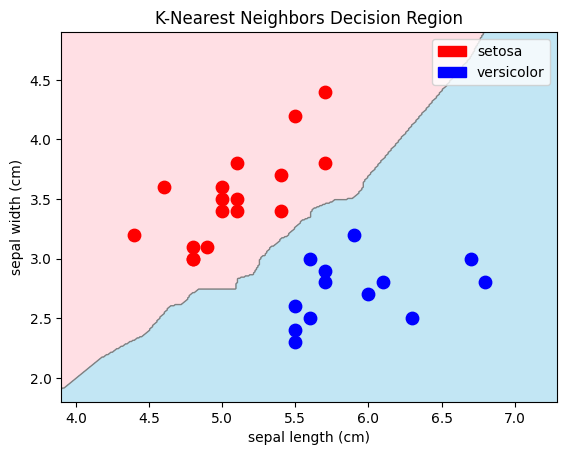

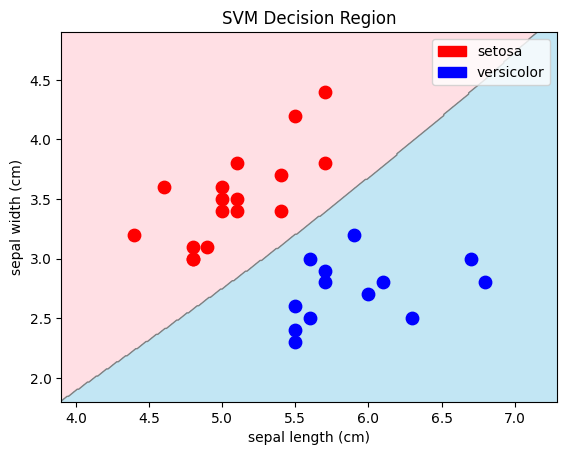

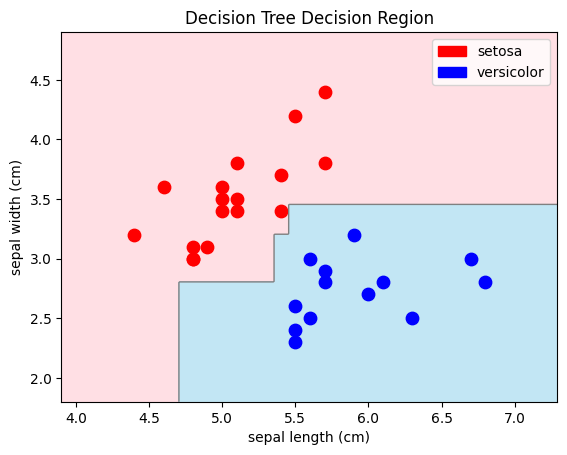

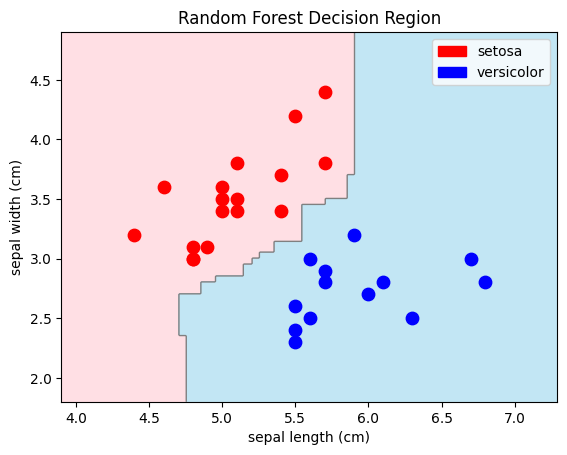

In [ ]:
# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

def decision_region(X, y, model, step=0.01, title='Decision Region', xlabel='Feature 1', ylabel='Feature 2', target_names=['setosa', 'versicolor']):
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # Ensure y has integer labels starting from 0
    unique_y = np.unique(y)
    y_adjusted = np.zeros_like(y, dtype=int)
    for i, val in enumerate(unique_y):
        y_adjusted[y == val] = i

    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, levels=np.arange(n_class + 1) - 0.5, cmap=ListedColormap(contourf_color), alpha=0.5)
    plt.contour(mesh_f0, mesh_f1, y_pred, levels=np.arange(n_class + 1) - 0.5, colors='gray', linewidths=1)
    for i, target in enumerate(unique_y):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

# Load the Iris dataset
iris = load_iris()
X = iris.data[:, :2]
y = iris.target
X_binary = X[y < 2]
y_binary = y[y < 2]
target_names_binary = iris.target_names[:2]
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)

# Initialize and train the classifiers
logistic_regression = LogisticRegression()
knn_classifier = KNeighborsClassifier()
svm_classifier = SVC()
decision_tree_classifier = DecisionTreeClassifier()
random_forest_classifier = RandomForestClassifier(random_state=42)

logistic_regression.fit(X_train, y_train)
knn_classifier.fit(X_train, y_train)
svm_classifier.fit(X_train, y_train)
decision_tree_classifier.fit(X_train, y_train)
random_forest_classifier.fit(X_train, y_train)

# Visualize the decision regions for each classifier
decision_region(X_test, y_test, logistic_regression, title='Logistic Regression Decision Region', xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], target_names=target_names_binary)
decision_region(X_test, y_test, knn_classifier, title='K-Nearest Neighbors Decision Region', xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], target_names=target_names_binary)
decision_region(X_test, y_test, svm_classifier, title='SVM Decision Region', xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], target_names=target_names_binary)
decision_region(X_test, y_test, decision_tree_classifier, title='Decision Tree Decision Region', xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], target_names=target_names_binary)
decision_region(X_test, y_test, random_forest_classifier, title='Random Forest Decision Region', xlabel=iris.feature_names[0], ylabel=iris.feature_names[1], target_names=target_names_binary)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(



Accuracy of Methods Using All Objective Variables (Multi-Value Classification - Standardized Data):
Accuracy of Logistic Regression: 0.97
Accuracy of K-Nearest Neighbors: 1.00
Accuracy of Support Vector Machine: 1.00
Accuracy of Decision Tree: 1.00
Accuracy of Random Forest: 1.00

--- Logistic Regression (Multi-Value) ---
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.91      0.95        11
   virginica       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38

Confusion Matrix:
[[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


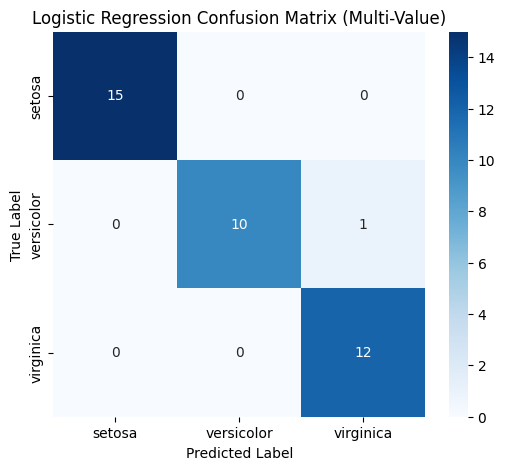


--- K-Nearest Neighbors (Multi-Value) ---
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


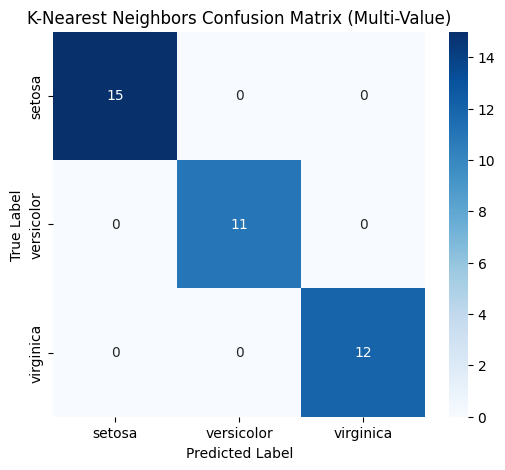


--- Support Vector Machine (Multi-Value) ---
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


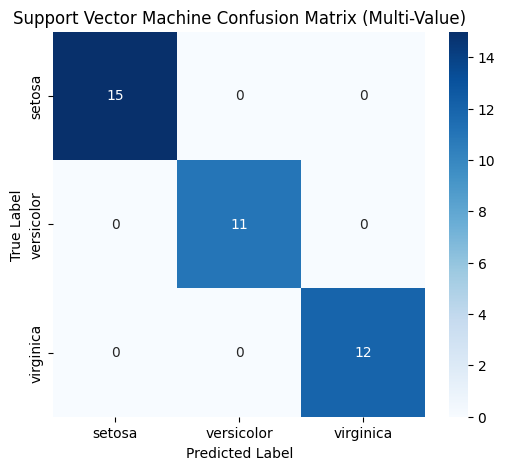


--- Decision Tree (Multi-Value) ---
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


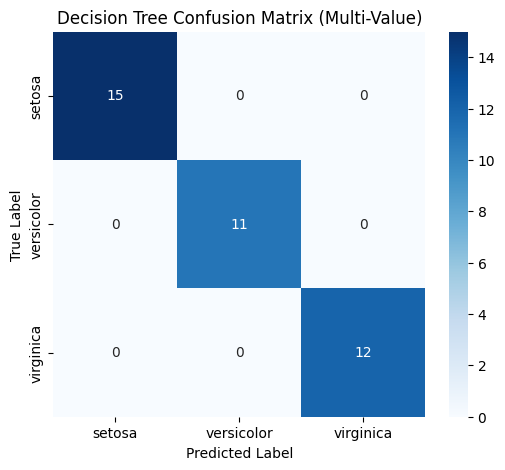


--- Random Forest (Multi-Value) ---
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      1.00      1.00        11
   virginica       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

Confusion Matrix:
[[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


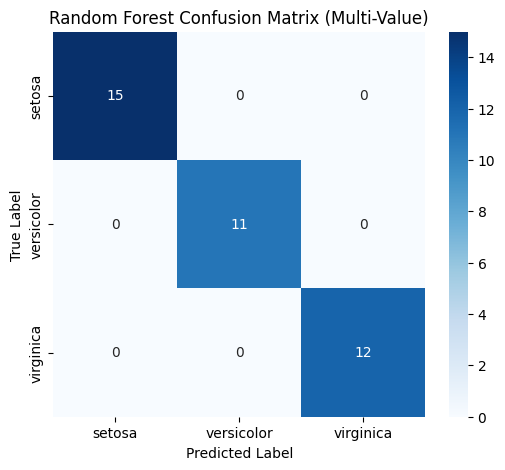

In [ ]:
# Accuracy of the Method Using All Objective Variables (Multi-Value Classification)
# Classifying all three Iris species using all four features.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the full Iris dataset
iris_full = load_iris()
X_full = iris_full.data
y_full = iris_full.target
target_names_full = iris_full.target_names
feature_names_full = iris_full.feature_names

# Split the full dataset into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size=0.25, random_state=42)

# Standardize the full dataset
scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

# Initialize and train the classifiers on the full, standardized data
logistic_regression_full = LogisticRegression(multi_class='ovr') # or 'multinomial'
knn_classifier_full = KNeighborsClassifier()
svm_classifier_full = SVC()
decision_tree_classifier_full = DecisionTreeClassifier(random_state=42)
random_forest_classifier_full = RandomForestClassifier(random_state=42)

logistic_regression_full.fit(X_train_full_scaled, y_train_full)
knn_classifier_full.fit(X_train_full_scaled, y_train_full)
svm_classifier_full.fit(X_train_full_scaled, y_train_full)
decision_tree_classifier_full.fit(X_train_full_scaled, y_train_full)
random_forest_classifier_full.fit(X_train_full_scaled, y_train_full)

# Evaluate the accuracy of each model on the full, standardized test data
y_pred_logistic_full = logistic_regression_full.predict(X_test_full_scaled)
y_pred_knn_full = knn_classifier_full.predict(X_test_full_scaled)
y_pred_svm_full = svm_classifier_full.predict(X_test_full_scaled)
y_pred_dtree_full = decision_tree_classifier_full.predict(X_test_full_scaled)
y_pred_rf_full = random_forest_classifier_full.predict(X_test_full_scaled)

accuracy_logistic_full = accuracy_score(y_test_full, y_pred_logistic_full)
accuracy_knn_full = accuracy_score(y_test_full, y_pred_knn_full)
accuracy_svm_full = accuracy_score(y_test_full, y_pred_svm_full)
accuracy_dtree_full = accuracy_score(y_test_full, y_pred_dtree_full)
accuracy_rf_full = accuracy_score(y_test_full, y_pred_rf_full)

print("\nAccuracy of Methods Using All Objective Variables (Multi-Value Classification - Standardized Data):")
print(f"Accuracy of Logistic Regression: {accuracy_logistic_full:.2f}")
print(f"Accuracy of K-Nearest Neighbors: {accuracy_knn_full:.2f}")
print(f"Accuracy of Support Vector Machine: {accuracy_svm_full:.2f}")
print(f"Accuracy of Decision Tree: {accuracy_dtree_full:.2f}")
print(f"Accuracy of Random Forest: {accuracy_rf_full:.2f}")

# Further evaluating with precision, recall, and F1-score for multi-class
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the models dictionary here
models = {
    'Logistic Regression': y_pred_logistic_full,
    'K-Nearest Neighbors': y_pred_knn_full,
    'Support Vector Machine': y_pred_svm_full,
    'Decision Tree': y_pred_dtree_full,
    'Random Forest': y_pred_rf_full
}

for name, y_pred in zip(models.keys(), models.values()): # we can also use models.items() to directly get key-value pairs
    print(f"\n--- {name} (Multi-Value) ---")
    print("Classification Report:")
    print(classification_report(y_test_full, y_pred, target_names=target_names_full))
    cm_full = confusion_matrix(y_test_full, y_pred)
    print("Confusion Matrix:")
    print(cm_full)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm_full, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names_full, yticklabels=target_names_full)
    plt.title(f'{name} Confusion Matrix (Multi-Value)')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

By examining the accuracy scores and the classification reports for the multi-value classification, we can identify the method that achieves the highest accuracy on the full Iris dataset. Often, methods like Random Forest or SVM with appropriate kernels tend to perform well on this dataset.

The confusion matrices will provide further insights into the types of errors each model makes in distinguishing between the three Iris species.

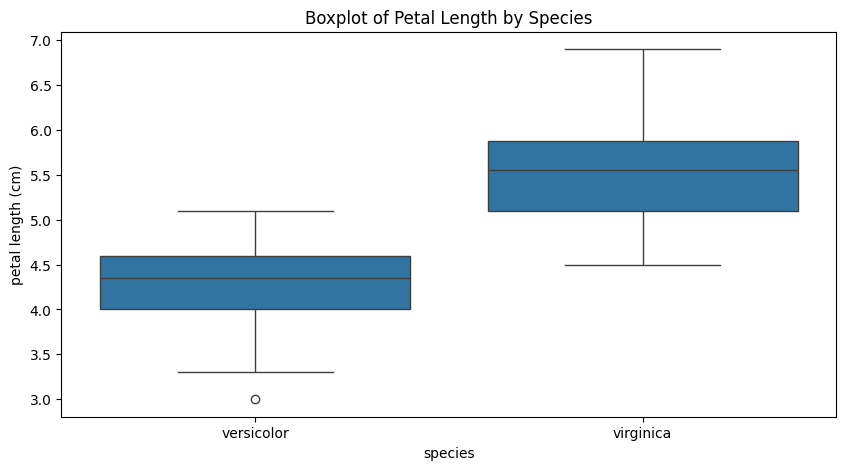

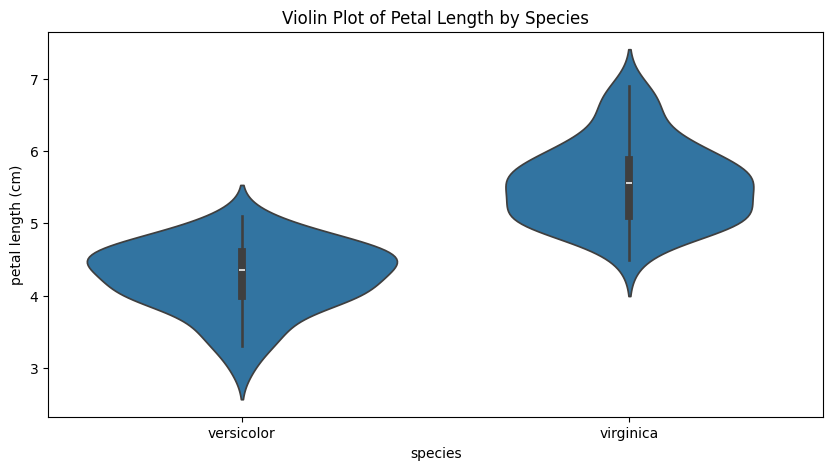

In [1]:
# box plot and violin plots for further viz
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

# Load data
data = load_iris()
iris_data = pd.DataFrame(data.data, columns=data.feature_names)
iris_data['target'] = data.target
iris_data['species'] = iris_data['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Filter only two classes
df_binary = iris_data[iris_data['species'].isin(['versicolor', 'virginica'])]

# Box plot
plt.figure(figsize=(10, 5))
sns.boxplot(x='species', y='petal length (cm)', data=df_binary)
plt.title('Boxplot of Petal Length by Species')
plt.show()

# Violin plot
plt.figure(figsize=(10, 5))
sns.violinplot(x='species', y='petal length (cm)', data=df_binary)
plt.title('Violin Plot of Petal Length by Species')
plt.show()
